In [1]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from tensorflow.keras.optimizers import RMSprop

from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
import nltk
from nltk.corpus import stopwords
import string
import numpy as np
import pandas as pd

import os
import sys
from keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing.sequence import pad_sequences
import keras.utils as ku
import keras.layers as kl
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, Concatenate
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model
from keras.initializers import Constant
from tensorflow.keras.preprocessing.sequence import pad_sequences


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

#from keras.models import Sequential
from tensorflow.keras.layers import Embedding, Activation, Dense, LSTM, Conv2D, Reshape, dot, Lambda, Dropout, MaxPooling2D
from keras.optimizers import SGD
from itertools import islice
from tensorflow.keras.layers import Flatten
from keras.models import model_from_json
from keras_preprocessing.image import ImageDataGenerator
from keras_preprocessing.sequence import TimeseriesGenerator


from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import math
import random
from keras.callbacks import TensorBoard, ModelCheckpoint, LearningRateScheduler, EarlyStopping
from datetime import *
from tensorflow.keras import optimizers
from keras.backend import int_shape
pd.set_option('display.max_colwidth',25)
from keras import backend as K
#from tensorflow.keras.layers import concatenate
#K.clear_session()

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import pathlib
rando_seed = 1234
np.random.seed(rando_seed)
#os.chdir('/media/alex/easystore/ids_monthly/BLM_images/2014_11_12')
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

2022-11-28 21:16:49.777351: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/slurm/lib64:
2022-11-28 21:16:49.777376: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [3]:
cols = ['tweet_id', 'date', 'text', 'support', 'hashtags', 'users', 'urls', 'media_urls', 'nfollowers', 'nfriends', 'file_name', 'path']

DATA = pd.read_csv('blm_apsa_sample3.csv', names = cols, dtype = {'tweet_id':str, 'text':str, 'support':str, 'path':str, 'file_name':str})
DATA.head()

,tweet_id,date,text,support,hashtags,users,urls,media_urls,nfollowers,nfriends,file_name,path
0,534514976191303680,Tue Nov 18 01:14:35 +...,Missouri Gov Declares...,2,NaN,NaN,NaN,http://pbs.twimg.com/...,85,20,B2r6ieiCQAAsrER.jpg,/media/alex/easystore...
1,535629606855143424,Fri Nov 21 03:03:44 +...,#Ferguson Lively prot...,1,NaN,NaN,NaN,http://pbs.twimg.com/...,576,528,B27wSReCMAA-MeD.jpg,/media/alex/easystore...
2,533637761258250242,Sat Nov 15 15:08:51 +...,School board fires Te...,1,NaN,NaN,NaN,http://pbs.twimg.com/...,2594,4126,B2fctmeCUAEiFZE.jpg,/media/alex/easystore...
3,535611054089187329,Fri Nov 21 01:50:01 +...,This campaign was fun...,1,NaN,NaN,NaN,http://pbs.twimg.com/...,6599,580,B27fajnCUAERtfW.jpg,/media/alex/easystore...
4,534532177803747328,Tue Nov 18 02:22:56 +...,WOW afraid of your fr...,1,NaN,NaN,NaN,http://pbs.twimg.com/...,3074,2627,B2sKLtcCIAAkbYR.png,/media/alex/easystore...


In [4]:
DATA.dtypes

tweet_id       object
date           object
text           object
support        object
hashtags      float64
users         float64
urls          float64
media_urls     object
nfollowers      int64
nfriends        int64
file_name      object
path           object
dtype: object

In [5]:
conditions = [
    (DATA['support'] == '0'),
    (DATA['support'] != '0')
]

values = ['0', '1']

DATA['support2'] = np.select(conditions, values)

DATA.head(50)

,tweet_id,date,text,support,hashtags,users,urls,media_urls,nfollowers,nfriends,file_name,path,support2
0,534514976191303680,Tue Nov 18 01:14:35 +...,Missouri Gov Declares...,2,NaN,NaN,NaN,http://pbs.twimg.com/...,85,20,B2r6ieiCQAAsrER.jpg,/media/alex/easystore...,1
1,535629606855143424,Fri Nov 21 03:03:44 +...,#Ferguson Lively prot...,1,NaN,NaN,NaN,http://pbs.twimg.com/...,576,528,B27wSReCMAA-MeD.jpg,/media/alex/easystore...,1
2,533637761258250242,Sat Nov 15 15:08:51 +...,School board fires Te...,1,NaN,NaN,NaN,http://pbs.twimg.com/...,2594,4126,B2fctmeCUAEiFZE.jpg,/media/alex/easystore...,1
3,535611054089187329,Fri Nov 21 01:50:01 +...,This campaign was fun...,1,NaN,NaN,NaN,http://pbs.twimg.com/...,6599,580,B27fajnCUAERtfW.jpg,/media/alex/easystore...,1
4,534532177803747328,Tue Nov 18 02:22:56 +...,WOW afraid of your fr...,1,NaN,NaN,NaN,http://pbs.twimg.com/...,3074,2627,B2sKLtcCIAAkbYR.png,/media/alex/easystore...,1
5,532701599094026242,Thu Nov 13 01:08:53 +...,#shaunking IS the def...,0,NaN,NaN,NaN,http://pbs.twimg.com/...,79180,45616,B2SJSCXIcAArA5_.png,/media/alex/easystore...,0
6,532561172923682817,Wed Nov 12 15:50:52 +...,"@TODAYshow: ""We've go...",2,NaN,NaN,NaN,http://pbs.twimg.com/...,1741,2889,B2QJjrfIAAAausK.jpg,/media/alex/easystore...,1
7,536574685988012033,Sun Nov 23 17:39:08 +...,"""Prayer and protest a...",1,NaN,NaN,NaN,http://pbs.twimg.com/...,3285,287,B3JL1XvIYAEPQmK.jpg,/media/alex/easystore...,1
8,535592316040273920,Fri Nov 21 00:35:33 +...,Local authorities fin...,1,NaN,NaN,NaN,http://pbs.twimg.com/...,3074,2627,B27OX4fCAAAz0_1.png,/media/alex/easystore...,1
9,535196685996425217,Wed Nov 19 22:23:28 +...,#BREAKING Rallies Bei...,2,NaN,NaN,NaN,http://pbs.twimg.com/...,2745,813,B21mjKNCMAAFP19.jpg,/media/alex/easystore...,1


In [6]:
len(DATA)


2000

In [7]:
DATA.groupby('support2').count()

,tweet_id,date,text,support,hashtags,users,urls,media_urls,nfollowers,nfriends,file_name,path
support2,,,,,,,,,,,,
0,421,421,421,421,0,0,0,421,421,421,421,421
1,1578,1578,1579,1579,0,1,0,1579,1579,1579,1579,1579


In [8]:
DATA = DATA.dropna(subset=['support2'])
len(DATA)

2000

In [9]:
DATA = DATA.drop(['path'], axis=1)

In [10]:
DATA.head()

,tweet_id,date,text,support,hashtags,users,urls,media_urls,nfollowers,nfriends,file_name,support2
0,534514976191303680,Tue Nov 18 01:14:35 +...,Missouri Gov Declares...,2,NaN,NaN,NaN,http://pbs.twimg.com/...,85,20,B2r6ieiCQAAsrER.jpg,1
1,535629606855143424,Fri Nov 21 03:03:44 +...,#Ferguson Lively prot...,1,NaN,NaN,NaN,http://pbs.twimg.com/...,576,528,B27wSReCMAA-MeD.jpg,1
2,533637761258250242,Sat Nov 15 15:08:51 +...,School board fires Te...,1,NaN,NaN,NaN,http://pbs.twimg.com/...,2594,4126,B2fctmeCUAEiFZE.jpg,1
3,535611054089187329,Fri Nov 21 01:50:01 +...,This campaign was fun...,1,NaN,NaN,NaN,http://pbs.twimg.com/...,6599,580,B27fajnCUAERtfW.jpg,1
4,534532177803747328,Tue Nov 18 02:22:56 +...,WOW afraid of your fr...,1,NaN,NaN,NaN,http://pbs.twimg.com/...,3074,2627,B2sKLtcCIAAkbYR.png,1


In [11]:
DATA['path'] = '/home/ajpineda/apsa_sample3/' + DATA['file_name'].astype(str)
DATA.head()

,tweet_id,date,text,support,hashtags,users,urls,media_urls,nfollowers,nfriends,file_name,support2,path
0,534514976191303680,Tue Nov 18 01:14:35 +...,Missouri Gov Declares...,2,NaN,NaN,NaN,http://pbs.twimg.com/...,85,20,B2r6ieiCQAAsrER.jpg,1,/home/ajpineda/apsa_s...
1,535629606855143424,Fri Nov 21 03:03:44 +...,#Ferguson Lively prot...,1,NaN,NaN,NaN,http://pbs.twimg.com/...,576,528,B27wSReCMAA-MeD.jpg,1,/home/ajpineda/apsa_s...
2,533637761258250242,Sat Nov 15 15:08:51 +...,School board fires Te...,1,NaN,NaN,NaN,http://pbs.twimg.com/...,2594,4126,B2fctmeCUAEiFZE.jpg,1,/home/ajpineda/apsa_s...
3,535611054089187329,Fri Nov 21 01:50:01 +...,This campaign was fun...,1,NaN,NaN,NaN,http://pbs.twimg.com/...,6599,580,B27fajnCUAERtfW.jpg,1,/home/ajpineda/apsa_s...
4,534532177803747328,Tue Nov 18 02:22:56 +...,WOW afraid of your fr...,1,NaN,NaN,NaN,http://pbs.twimg.com/...,3074,2627,B2sKLtcCIAAkbYR.png,1,/home/ajpineda/apsa_s...


In [12]:
DATA = DATA[[os.path.isfile(i) for i in DATA['path']]]

In [13]:
#DATA = DATA[DATA.support != '2']
len(DATA)

1941

In [14]:
remove_n = 41
drop_indices = np.random.choice(DATA.index, remove_n, replace=False)
DATA = DATA.drop(drop_indices)
len(DATA)

1900

In [15]:
#Shuffle data

DATA = DATA.sample(frac=1, random_state=1234).reset_index(drop=True)
DATA.head()

,tweet_id,date,text,support,hashtags,users,urls,media_urls,nfollowers,nfriends,file_name,support2,path
0,529365926848655362,Mon Nov 03 20:14:06 +...,From Michael Brown to...,1,NaN,NaN,NaN,http://pbs.twimg.com/...,1378,2073,B1ivgU8CIAET2to.jpg,1,/home/ajpineda/apsa_s...
1,532918918894350336,Thu Nov 13 15:32:26 +...,LIVE NOW: Michael Bro...,2,NaN,NaN,NaN,http://pbs.twimg.com/...,14626239,539,B2VOlGjIEAAZAMU.jpg,1,/home/ajpineda/apsa_s...
2,540319890083938304,Thu Dec 04 01:41:15 +...,The West Side Highway...,1,NaN,NaN,NaN,http://pbs.twimg.com/...,2533,1480,B3-aDL8CMAEfpUg.jpg,1,/home/ajpineda/apsa_s...
3,535241151075581952,Thu Nov 20 01:20:09 +...,These must be the #Ru...,1,NaN,NaN,NaN,http://pbs.twimg.com/...,2154,193,B22O-tOIAAANBrC.jpg,1,/home/ajpineda/apsa_s...
4,540320314555498496,Thu Dec 04 01:42:56 +...,Why I Work: To be at ...,1,NaN,NaN,NaN,http://pbs.twimg.com/...,71858,9698,B3-Z7ZACcAEyBhI.png,1,/home/ajpineda/apsa_s...


In [14]:
# Test data is set aside until parameter tuning is done

#test_data = DATA.sample(n=250, replace=False, weights=None, random_state=1234, axis=None)
#DATA = DATA.drop(test_data.index)
#len(test_data)

In [15]:
#test_data.groupby('support').count()

In [16]:
# Validation data used to check for overfitting

val_data = DATA.sample(n=250, replace=False, weights=None, random_state=1234, axis=None)
train_data = DATA.drop(val_data.index)
len(val_data)

250

In [17]:
val_data.groupby('support2').count()

,tweet_id,date,text,support,hashtags,users,urls,media_urls,nfollowers,nfriends,file_name,path
support2,,,,,,,,,,,,
0,59,59,59,59,0,0,0,59,59,59,59,59
1,191,191,191,191,0,0,0,191,191,191,191,191


In [18]:
#len(train_data)
train_data.groupby('support2').count()

,tweet_id,date,text,support,hashtags,users,urls,media_urls,nfollowers,nfriends,file_name,path
support2,,,,,,,,,,,,
0,352,352,352,352,0,0,0,352,352,352,352,352
1,1298,1298,1298,1298,0,0,0,1298,1298,1298,1298,1298


In [19]:
train_data.head()

,tweet_id,date,text,support,hashtags,users,urls,media_urls,nfollowers,nfriends,file_name,support2,path
0,529365926848655362,Mon Nov 03 20:14:06 +...,From Michael Brown to...,1,NaN,NaN,NaN,http://pbs.twimg.com/...,1378,2073,B1ivgU8CIAET2to.jpg,1,/home/ajpineda/apsa_s...
1,532918918894350336,Thu Nov 13 15:32:26 +...,LIVE NOW: Michael Bro...,2,NaN,NaN,NaN,http://pbs.twimg.com/...,14626239,539,B2VOlGjIEAAZAMU.jpg,1,/home/ajpineda/apsa_s...
2,540319890083938304,Thu Dec 04 01:41:15 +...,The West Side Highway...,1,NaN,NaN,NaN,http://pbs.twimg.com/...,2533,1480,B3-aDL8CMAEfpUg.jpg,1,/home/ajpineda/apsa_s...
3,535241151075581952,Thu Nov 20 01:20:09 +...,These must be the #Ru...,1,NaN,NaN,NaN,http://pbs.twimg.com/...,2154,193,B22O-tOIAAANBrC.jpg,1,/home/ajpineda/apsa_s...
4,540320314555498496,Thu Dec 04 01:42:56 +...,Why I Work: To be at ...,1,NaN,NaN,NaN,http://pbs.twimg.com/...,71858,9698,B3-Z7ZACcAEyBhI.png,1,/home/ajpineda/apsa_s...


In [20]:
#os.chdir('/media/alex/easystore/ids_monthly/BLM_images/apsa_sample3')

In [20]:
# re: generators with multiple inputs

#trainer_path = 'train/'
#im_size = 28
img_width, img_height = 96, 96
batch_size = 50

input_imgen = ImageDataGenerator(rescale = 1./255)


def text_generator(a,labs, n):
    while True:
         for i in range(a.shape[0] // n):
            d2 = a[n*i:n*(i+1)]
            y_text = labs[n*i:n*(i+1)]
            yield d2, y_text       
            
def multi_input_generator(df, x_image, y_image, x_txt, y_txt, b_size): 
    t1 = input_imgen.flow_from_dataframe(
        dataframe=df,
        directory = './apsa_sample3',
        x_col = x_image,
        y_col = y_image,
        target_size=(img_width, img_height),
        batch_size=b_size,
        class_mode='categorical',
        validate_filenames=False)
    
    t2 = text_generator(a=x_txt, labs = y_txt, n=b_size)
    
    while True:
        d1,y = t1.next()
        d1 = np.expand_dims(d1, axis = 0)
        d2, y_text = t2.__next__()
        yield [d2, d1[0]], [y_text, y]



In [21]:
##############################################################
###### TEXT PRE-PROCESSING ###############################


# PARAMETERS
#MAX_SEQUENCE_LENGTH = 30
MAX_NUM_WORDS = 25
EMBEDDING_DIM = 100
#VALIDATION_SPLIT = 0.2


# SUBSET TO ONLY DATA AND LABELS
train_data_text = train_data[['text','support2']]
train_labels_text = train_data['support2'].values
train_data_text.head()

val_data_text = val_data[['text','support2']]
val_labels_text = val_data['support2'].values
val_data_text.head()

,text,support2
395,Even the kittens stan...,1
385,Flashback: Obama agre...,0
1549,Rest in peace mike br...,1
243,Rainy Sunday in #ferg...,1
1074,Local authorities fin...,1


In [22]:
# tokenizers for training text data
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, lower=True,split=' ')
tokenizer.fit_on_texts(train_data_text['text'].values)
sequences = tokenizer.texts_to_sequences(train_data_text['text'].values)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

train_data_text = pad_sequences(sequences)
train_labels_text = ku.to_categorical(np.asarray(train_labels_text))

print('Shape of train data tensor:', train_data_text.shape)
print('Shape of train label tensor:', train_labels_text.shape)


##########################################################################
# tokenizers for val text data


#tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, lower=True,split=' ')
#tokenizer.fit_on_texts(val_data_text['text'].values)
val_sequences = tokenizer.texts_to_sequences(val_data_text['text'].values)

#word_index = tokenizer.word_index
#print('Found %s unique val tokens.' % len(word_index))

val_data_text = pad_sequences(val_sequences)
val_labels_text = ku.to_categorical(np.asarray(val_labels_text))

#print('Shape of val data tensor:', val_data_text.shape)
#print('Shape of val label tensor:', val_labels_text.shape)

Found 6967 unique tokens.
Shape of train data tensor: (1650, 15)
Shape of train label tensor: (1650, 2)


In [23]:
print(train_data_text[1])

[ 0  0  0  0  0  0  0  0 21  3  1  2  3  1  2]


In [24]:
train_generator = multi_input_generator(df = train_data, x_image='file_name', y_image='support2',
                                    x_txt=train_data_text, y_txt=train_labels_text, b_size=batch_size)

val_generator = multi_input_generator(df = val_data, x_image='file_name', y_image='support2',
                                    x_txt=val_data_text, y_txt=val_labels_text, b_size=batch_size)

#test_generator = multi_input_generator(df = test_data, x_image='file_name', y_image='support',
#                                    x_txt=test_data['text'], y_txt=test_data['support'], b_size=batch_size)

In [25]:
trainsetsize = len(train_data)
print('Number of training observations: ' + str(trainsetsize))

Number of training observations: 1650


In [26]:
valsetsize = len(val_data)
print('Number of val observations: ' + str(valsetsize))

Number of val observations: 250


In [27]:

# Loading embeddings from Stanford NLP
# Good rundown of source code: https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html

# First, build index mapping words in the embeddings set
# to their embedding vector

print("Loading embeddings.")

embeddings_index = dict()
#texts = []
f = open('glove.6B.100d.txt', errors='ignore')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
#    texts.append(word)
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))





Loading embeddings.
Loaded 400000 word vectors.


In [28]:
# At this point we can leverage our embedding_index dictionary and our word_index to compute our embedding matrix:


print('Preparing embedding matrix.')

# prepare embedding matrix
num_words = min(MAX_NUM_WORDS, len(word_index)) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i > MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_NUM_WORDS,
                            trainable=False)



Preparing embedding matrix.


In [31]:
# Load image model
from tensorflow.keras.applications.vgg16 import VGG16
image_model = VGG16(include_top=False, input_shape = (img_width, img_height, 3), weights='imagenet', pooling=None, classes=2)

for layer in image_model.layers:
    layer.trainable = False

2022-10-12 13:30:50.564544: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/slurm/lib64:
2022-10-12 13:30:50.564582: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-12 13:30:50.564596: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (gl3107.arc-ts.umich.edu): /proc/driver/nvidia/version does not exist
2022-10-12 13:30:50.564836: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [32]:
# Let's take a look to see how many layers are in the base model
#print("Number of layers in the base model: ", len(INCV3_model.layers))

In [33]:
# Fine-tune from this layer onwards
#ine_tune_at = 306

# Freeze the layers in Inception which you don't want to train. 
#for layer in INCV3_model.layers[:fine_tune_at]:
#    layer.trainable = False

In [34]:
###########################################################################
########## MODEL CONSTRUCTION #############################################

# https://www.kaggle.com/kredy10/simple-lstm-for-text-classification

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dot


sequence_input = Input(shape=(None, ), dtype='int64')
embedded_sequences = embedding_layer(sequence_input)
x_text = Conv1D(32, kernel_size = 5, activation="relu", padding = 'same')(embedded_sequences)
x_text = MaxPooling1D(5)(x_text)
x_text = Conv1D(32, kernel_size = 5, activation="relu", padding = 'same')(x_text)
x_text = GlobalMaxPooling1D()(x_text)
x_text = Dense(16, activation="relu")(x_text)
#x_text = Dropout(0.5)(x_text)
preds = Dense(2, activation='relu')(x_text)



# Adding custom Layers

x_image = image_model.output

x_image = Conv2D(4, 1, activation="relu", padding = 'same')(x_image)
x_image = MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same')(x_image)
x_image = Conv2D(4, 1, activation="relu", padding = 'same')(x_image)
x_image = MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same')(x_image)
x_image = Conv2D(4, 1, activation="relu", padding = 'same')(x_image)
x_image = MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same')(x_image)
x_image = Flatten()(x_image)
img_predictions = Dense(2, activation="relu")(x_image)


#merged = Dot(axes=1)([preds, img_predictions])

merged = Concatenate()([preds, img_predictions])

# We stack densely-connected network on top
x = Dense(64, activation='relu')(merged)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(8, activation='relu')(x)
x = Dense(4, activation='relu')(x)
#x = Dropout(0.5)(x)
main_output = Dense(2, activation='sigmoid', name = 'main_output')(x)



# Defining a model with two inputs and one outputs
blm_model = Model([sequence_input, image_model.input], [main_output])


tbCallBack = TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=False)


print("ROMA VICTOR!")

sgd = optimizers.SGD(lr=0.01, decay=1e-5, momentum=0.95, nesterov=True, clipvalue=.5)
blm_model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics = ['categorical_accuracy'])




ROMA VICTOR!


/home/ajpineda/.local/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [35]:
blm_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 block1_conv1 (Conv2D)          (None, 96, 96, 64)   1792        ['input_1[0][0]']                
                                                                                                  
 block1_conv2 (Conv2D)          (None, 96, 96, 64)   36928       ['block1_conv1[0][0]']           
                                                                                                  
 block1_pool (MaxPooling2D)     (None, 48, 48, 64)   0           ['block1_conv2[0][0]']           
                                                                                              

In [36]:
history = blm_model.fit(train_generator,
                        steps_per_epoch=trainsetsize//batch_size,
                    class_weight = None,
                        epochs = 80,
                        validation_data = val_generator,
                        validation_steps = valsetsize//batch_size)
                        #use_multiprocessing=True,
                        #shuffle=False)

Found 1650 non-validated image filenames belonging to 2 classes.
Epoch 1/80
33/33 [==============================] - 109s 3s/step - loss: 0.5611 - categorical_accuracy: 0.7855 - val_loss: 0.5672 - val_categorical_accuracy: 0.7640
Epoch 2/80
33/33 [==============================] - 107s 3s/step - loss: 0.5224 - categorical_accuracy: 0.7867 - val_loss: 0.5464 - val_categorical_accuracy: 0.7640
Epoch 3/80
33/33 [==============================] - 108s 3s/step - loss: 0.5178 - categorical_accuracy: 0.7867 - val_loss: 0.5487 - val_categorical_accuracy: 0.7640
Epoch 4/80
33/33 [==============================] - 107s 3s/step - loss: 0.5171 - categorical_accuracy: 0.7867 - val_loss: 0.5471 - val_categorical_accuracy: 0.7640
Epoch 5/80
33/33 [==============================] - 108s 3s/step - loss: 0.5150 - categorical_accuracy: 0.7867 - val_loss: 0.5470 - val_categorical_accuracy: 0.7640
Epoch 6/80
33/33 [==============================] - 108s 3s/step - loss: 0.5111 - categorical_accuracy: 0.7867

In [37]:
blm_model.save('blm_model_1012.h5')

In [29]:
model1 = load_model('blm_model_1012.h5')
model1.summary()

2022-11-28 21:23:56.628902: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/slurm/lib64:
2022-11-28 21:23:56.628938: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-28 21:23:56.628950: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (gl3198.arc-ts.umich.edu): /proc/driver/nvidia/version does not exist
2022-11-28 21:23:56.629720: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 block1_conv1 (Conv2D)          (None, 96, 96, 64)   1792        ['input_1[0][0]']                
                                                                                                  
 block1_conv2 (Conv2D)          (None, 96, 96, 64)   36928       ['block1_conv1[0][0]']           
                                                                                                  
 block1_pool (MaxPooling2D)     (None, 48, 48, 64)   0           ['block1_conv2[0][0]']           
                                                                                              

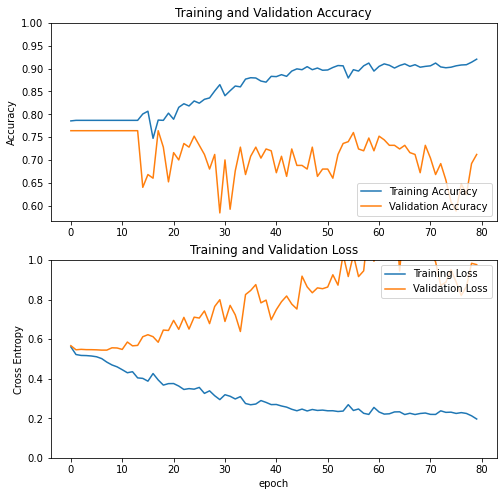

In [40]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [30]:
n = 1649
train_labels0 = []
train_labels1 = []
train_preds = []

for i, tweet in enumerate(train_generator):
    
    if i % 10 == 0:
            
        print("Image Number: ", i)

    pred1 = model1.predict(tweet[0], use_multiprocessing = False)

    train_preds.append(pred1)

    train_labels0.append(tweet[1][0])
    train_labels1.append(tweet[1][1])

    if i >= n:
        break

train_predictions = []
# Convert to an array of binary values
for i in train_preds:
    
    train_predictions.append(np.argmax(i, axis=1))
    
len(train_predictions)



Found 1650 non-validated image filenames belonging to 2 classes.
Image Number:  0
2/2 [==============================] - 3s 917ms/step
Image Number:  10
2/2 [==============================] - 3s 915ms/step
Image Number:  20
2/2 [==============================] - 3s 916ms/step
Image Number:  30
2/2 [==============================] - 3s 916ms/step
Image Number:  40
2/2 [==============================] - 3s 915ms/step
Image Number:  50
2/2 [==============================] - 3s 916ms/step
Image Number:  60
2/2 [==============================] - 3s 915ms/step
Image Number:  70
2/2 [==============================] - 3s 919ms/step
Image Number:  80
2/2 [==============================] - 3s 916ms/step
Image Number:  90
2/2 [==============================] - 3s 918ms/step
Image Number:  100
2/2 [==============================] - 3s 916ms/step
Image Number:  110
2/2 [==============================] - 3s 916ms/step
Image Number:  120
2/2 [==============================] - 3s 916ms/step
Image Numb

1650

In [31]:

train_labs0 = []

for i in train_labels0:
    
    train_labs0.append(np.argmax(i, axis=1))



train_labs1 = []

for i in train_labels1:
    
    train_labs1.append(np.argmax(i, axis=1))

train_predictions_final = np.concatenate(train_predictions).ravel().tolist()
train_labs0_final = np.concatenate(train_labs0).ravel().tolist()
train_labs1_final = np.concatenate(train_labs1).ravel().tolist()

In [34]:
len(train_labels1)

1650

Normalized confusion matrix
[[0.70738636 0.29261364]
 [0.01771957 0.98228043]]


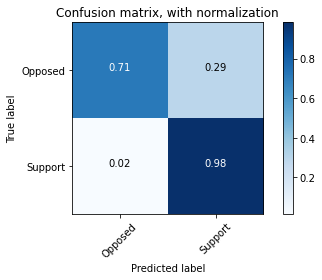

In [35]:
import itertools

# Grab true labels from the validation generator


# Generate confusion matrix

# labels = ['W', 'NW']
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


conf_mat = confusion_matrix(train_labs0_final, train_predictions_final, labels = [0, 1], sample_weight=None)
#print(conf_mat)
plot_confusion_matrix(conf_mat, classes=['Opposed', 'Support'],
                      title='Confusion matrix, with normalization', normalize = True)

In [36]:
n = 249
labels0 = []
labels1 = []
preds = []


for i, tweet in enumerate(val_generator):
    
    if i % 10 == 0:
            
        print("Image Number: ", i)

    pred1 = model1.predict(tweet[0], use_multiprocessing = False)

    preds.append(pred1)

    labels0.append(tweet[1][0])
    labels1.append(tweet[1][1])

    if i >= n:
        break

Found 250 non-validated image filenames belonging to 2 classes.
Image Number:  0
2/2 [==============================] - 3s 866ms/step
Image Number:  10
2/2 [==============================] - 2s 860ms/step
Image Number:  20
2/2 [==============================] - 3s 896ms/step
Image Number:  30
2/2 [==============================] - 3s 895ms/step
Image Number:  40
2/2 [==============================] - 3s 891ms/step
Image Number:  50
2/2 [==============================] - 3s 894ms/step
Image Number:  60
2/2 [==============================] - 3s 896ms/step
Image Number:  70
2/2 [==============================] - 3s 896ms/step
Image Number:  80
2/2 [==============================] - 3s 893ms/step
Image Number:  90
2/2 [==============================] - 3s 897ms/step
Image Number:  100
2/2 [==============================] - 3s 891ms/step
Image Number:  110
2/2 [==============================] - 3s 895ms/step
Image Number:  120
2/2 [==============================] - 3s 897ms/step
Image Numbe

In [37]:
val_predictions = []
# Convert to an array of binary values
for i in preds:
    
    val_predictions.append(np.argmax(i, axis=1))
    
len(val_predictions)

val_labs0 = []

for i in labels0:
    
    val_labs0.append(np.argmax(i, axis=1))



val_labs1 = []

for i in labels1:
    
    val_labs1.append(np.argmax(i, axis=1))

val_predictions_final = np.concatenate(val_predictions).ravel().tolist()
val_labs0_final = np.concatenate(val_labs0).ravel().tolist()
val_labs1_final = np.concatenate(val_labs1).ravel().tolist()

Normalized confusion matrix
[[0.25423729 0.74576271]
 [0.14659686 0.85340314]]


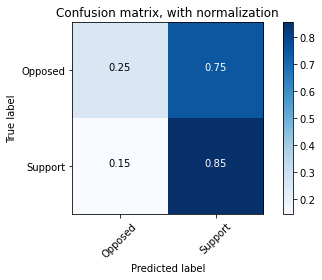

In [39]:
conf_mat = confusion_matrix(val_labs0_final, val_predictions_final, labels = [0, 1], sample_weight=None)
#print(conf_mat)
plot_confusion_matrix(conf_mat, classes=['Opposed', 'Support'],
                      title='Confusion matrix, with normalization', normalize = True)